# コード2-4：非線形常微分方程式の数値計算の実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

非線形常微分方程式を数値計算する例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み込み

In [1]:
## 必要があればインストール
# !pip3 install matplotlib numpy scipy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## 非線形常微分方程式の数値計算

式（2.12）

$$
\begin{align}
\frac{d T \left( t \right)}{dt} &= L(t) - \beta T(t) V(t) \\
\frac{d I \left( t \right)}{dt} &= \beta T(t) V(t) - \delta I(t) \\
\frac{d V \left( t \right)}{dt} &= p I(t) - c V(t)
\end{align}
$$

について
1. $L(t) = \lambda - d T(t), \lambda = 0, d = 0.057, \beta = 8.61 \times 10^{-11}, \delta = 0.057 + 1.75, p = 3.26 \times 10^4, c = 1.93 + 0.039, T(0) = 6.46 \times 10^6, I(0) = 10^{-1}, V(0) = 5.0 \times 10^4$
2. $L(t) =g T(t) \left( 1 - \frac{T(t)}{K} \right), g = 0.6, K = 10^7, \beta = 3.0 \times 10^{-11}, \delta = 0.5, p = 5.0 \times 10^4, c = 10, T(0) = 10^6, I(0) = 10, V(0) = 2.0 \times 10^3$

の時の$T(t), I(t), V(t)$を数値計算によって求める。

※1はできるだけ式2.13、図2.5および表2.1に合わせた。

SciPyパッケージに含まれるintegrateモジュールのodeint関数を使う。  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [2]:
## 計算する時刻の設定
Tmin = 0.0
Tmax = 20.0
step_size = 0.0001

## パラメータの設定
## 1. lambda, d, beta, delta, p, c, T(0), I(0), V(0)
pars1 = np.array([0.0, 0.057, 8.61*np.power(10.0, -11.0),
                  0.057 + 1.75, 3.26*np.power(10.0, 4.0), 1.93 + 0.039,
                  6.46*np.power(10.0, 6.0), np.power(10.0, -1.0), 5.0*np.power(10.0, 4.0)])

## 2. g, K, beta, delta, p, c, T(0), I(0), V(0)
pars2 = np.array([0.6, np.power(10.0, 7.0), 3.0*np.power(10.0, -11.0),
                  0.5, 5.0*np.power(10.0, 4.0), 10.0,
                  np.power(10.0, 6.0), 10.0, 2000.0])

In [3]:
## 傾き（微分）の定義
def ode_derives1(var, t, plambda, d, beta, delta, p, c):
  
  ## var[0]: I(t), var[1]: V(t)
  dTdt = plambda - d * var[0] - beta * var[0] * var[2]
  dIdt = beta * var[0] * var[2] - delta * var[1]
  dVdt = p * var[1] - c * var[2]

  return [dTdt, dIdt, dVdt]

def ode_derives2(var, t, g, K, beta, delta, p, c):
  
  ## var[0]: I(t), var[1]: V(t)
  dTdt = g * var[0] * (1.0 - (var[0]/K)) - beta * var[0] * var[2]
  dIdt = beta * var[0] * var[2] - delta * var[1]
  dVdt = p * var[1] - c * var[2]

  return [dTdt, dIdt, dVdt]

## パラメータを受け取ってodeint関数に渡す関数
def ODEs1(parms):
  plambda = parms[0]
  d = parms[1]
  beta = parms[2]
  delta = parms[3]
  p = parms[4]
  c = parms[5]

  ## 計算のタイムステップ
  t_list = np.arange(Tmin, Tmax + step_size, step_size)
  ## 初期値 T(0), I(0), V(0)
  var_init = [parms[6], parms[7], parms[8]]
  ## 微分方程式の計算
  var_list = odeint(ode_derives1, var_init, t_list, args = (plambda, d, beta, delta, p, c))

  return np.vstack([t_list, var_list.T])

def ODEs2(parms):
  g = parms[0]
  K = parms[1]
  beta = parms[2]
  delta = parms[3]
  p = parms[4]
  c = parms[5]

  ## 計算のタイムステップ
  t_list = np.arange(Tmin, Tmax + step_size, step_size)
  ## 初期値 T(0), I(0), V(0)
  var_init = [parms[6], parms[7], parms[8]]
  ## 微分方程式の計算
  var_list = odeint(ode_derives2, var_init, t_list, args = (g, K, beta, delta, p, c))

  return np.vstack([t_list, var_list.T])

In [4]:
out1 = ODEs1(pars1)
out2 = ODEs2(pars2)

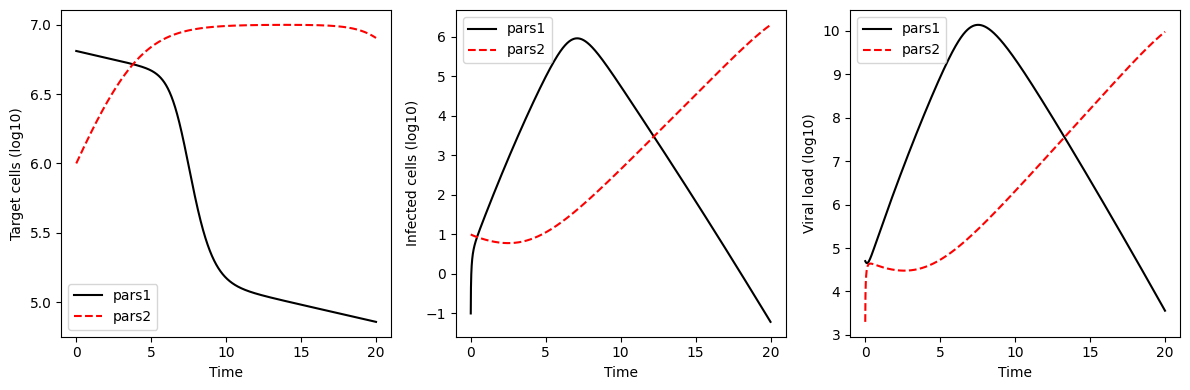

In [5]:
## プロットの準備
fig = plt.figure(figsize=(12,4))

## V(t)のプロット
ax1 = fig.add_subplot(1, 3, 1) ## 1行2列のプロットの１番目
ax1.plot(out1[0], np.log10(out1[1]), color = "black", label = "pars1") ## pars1でのT(t)の数値解のプロット
ax1.plot(out2[0], np.log10(out2[1]), color = "red", linestyle = "dashed", label = "pars2") ## pars2でのT(t)の数値解のプロット
ax1.set_xlabel("Time") ## x軸のラベル
ax1.set_ylabel("Target cells (log10)") ## y軸のラベル
ax1.legend() ## レジェンドの追加

## I(t)のプロット
ax1 = fig.add_subplot(1, 3, 2) ## 1行2列のプロットの１番目
ax1.plot(out1[0], np.log10(out1[2]), color = "black", label = "pars1") ## pars1でのI(t)の数値解のプロット
ax1.plot(out2[0], np.log10(out2[2]), color = "red", linestyle = "dashed", label = "pars2") ## pars2でのI(t)の数値解のプロット
ax1.set_xlabel("Time") ## x軸のラベル
ax1.set_ylabel("Infected cells (log10)") ## y軸のラベル
ax1.legend() ## レジェンドの追加

## V(t)のプロット
ax2 = fig.add_subplot(1, 3, 3) ## 1行2列のプロットの2番目
ax2.plot(out1[0], np.log10(out1[3]), color = "black", label = "pars1") ## pars1でのV(t)の数値解のプロット
ax2.plot(out2[0], np.log10(out2[3]), color = "red", linestyle = "dashed", label = "pars2") ## pars2でのV(t)の数値解のプロット
ax2.set_xlabel("Time") ## x軸のラベル
ax2.set_ylabel("Viral load (log10)") ## y軸のラベル
ax2.legend() ## レジェンドの追加

fig.tight_layout()
fig.show()